In [ ]:
Laboratorio 11

# Nueva sección

In [3]:
import pickle

with open("/dataset_ekg.pkl", "rb") as f:
    dataset = pickle.load(f)

dataset.keys()

dict_keys(['NSR', 'VT', 'IVR', 'VFL', 'Fusion', 'LBBBB', 'RBBBB', 'SDHB', 'PR', 'APB', 'AFL', 'AFIB', 'SVTA', 'WPW', 'PVC', 'Bigeminy', 'Trigeminy'])

In [4]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 13.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

clase = "Trigeminy"
fila  = 0

# Extraer la señal (es un fragmento de ECG)
ecg_signal = dataset[clase][fila, :]

print("Clase:", clase)
print("Forma de la señal:", ecg_signal.shape)

# Frecuencia de muestreo de la base MIT-BIH
fs = 360  # Hz

# Vector de tiempo
t = np.arange(ecg_signal.size) / fs

Clase: Trigeminy
Forma de la señal: (3600,)


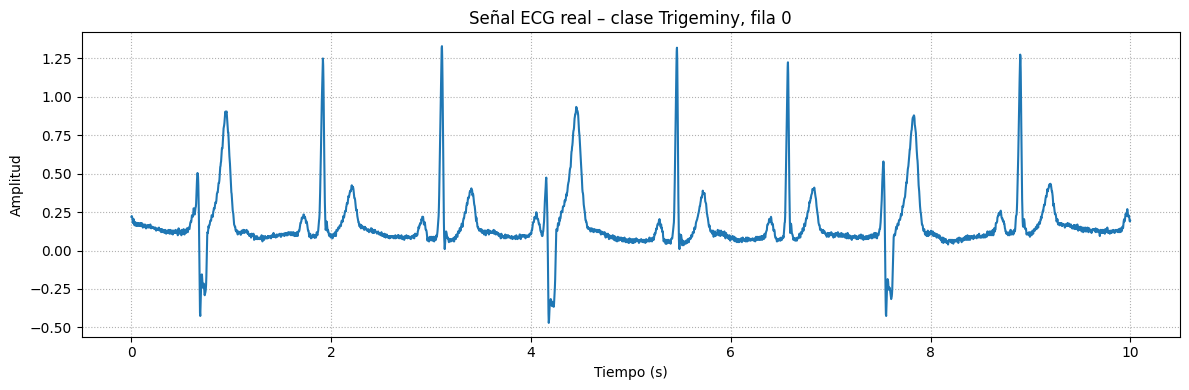

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal ECG real – clase {clase}, fila {fila}")
plt.grid(ls=":")
plt.tight_layout()
plt.show()

In [10]:
# Procesamiento completo del ECG
signals, info_nk = nk.ecg_process(ecg_signal, sampling_rate=fs)

import numpy as np

def limpiar_peaks(peaks):
    arr = np.array(peaks, dtype=float)
    arr = arr[~np.isnan(arr)]
    return arr.astype(int)
# Usamos la función para cada tipo de onda
p_peaks = limpiar_peaks(info_nk["ECG_P_Peaks"])
r_peaks = limpiar_peaks(info_nk["ECG_R_Peaks"])
t_peaks = limpiar_peaks(info_nk["ECG_T_Peaks"])

print("Nº de P detectadas:", len(p_peaks))
print("Nº de R detectadas:", len(r_peaks))
print("Nº de T detectadas:", len(t_peaks))
print("P_peaks:", p_peaks)
print("T_peaks:", t_peaks)



Nº de P detectadas: 10
Nº de R detectadas: 10
Nº de T detectadas: 8
P_peaks: [ 157  620 1048 1409 1492 1902 2302 2628 2708 3130]
T_peaks: [ 339  793 1223 1603 2060 2457 2818 3309]


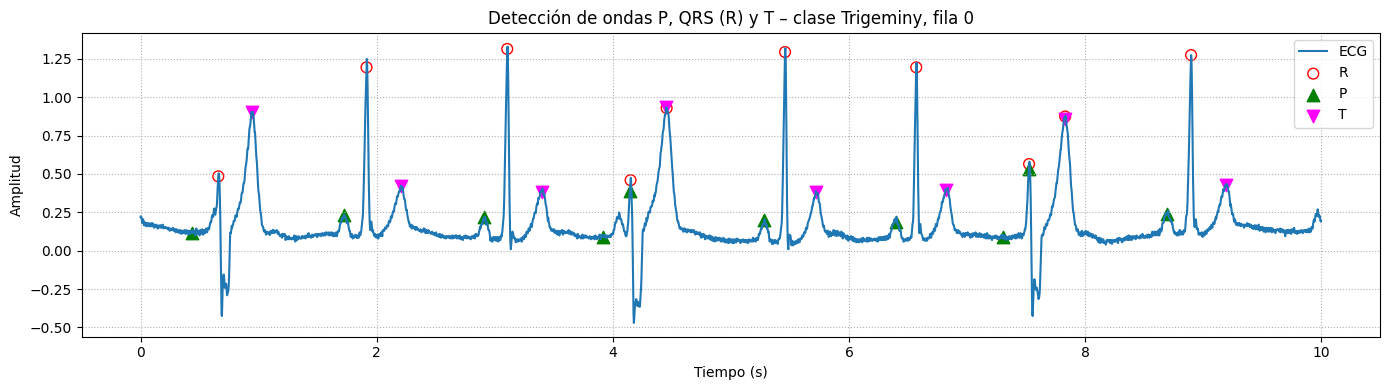

In [11]:
plt.figure(figsize=(14, 4))

# Señal ECG
plt.plot(t, ecg_signal, label="ECG")

# R-peaks (QRS)
if len(r_peaks) > 0:
    plt.scatter(t[r_peaks], ecg_signal[r_peaks],
                s=60, marker='o', facecolors='none', edgecolors='red', label='R')

# Ondas P
if len(p_peaks) > 0:
    plt.scatter(t[p_peaks], ecg_signal[p_peaks],
                s=80, marker='^', color='green', label='P')

# Ondas T
if len(t_peaks) > 0:
    plt.scatter(t[t_peaks], ecg_signal[t_peaks],
                s=80, marker='v', color='magenta', label='T')
else:
    print("⚠️ NeuroKit2 no detectó ondas T sin NaN en esta señal.")

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Detección de ondas P, QRS (R) y T – clase {clase}, fila {fila}")
plt.legend()
plt.grid(ls=":")
plt.tight_layout()
plt.show()
